In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df=pd.read_csv('EV_population.csv')
df.head()

,Date,County,State,Vehicle Primary Use,Battery Electric Vehicles (BEVs),Plug-In Hybrid Electric Vehicles (PHEVs),Electric Vehicle (EV) Total,Non-Electric Vehicle Total,Total Vehicles,Percent Electric Vehicles
0,January 31 2018,Brevard,FL,Passenger,0,1,1,109,110,0.91
1,March 31 2021,Pinellas,FL,Passenger,1,1,2,113,115,1.74
2,August 31 2020,Shasta,CA,Passenger,1,0,1,36,37,2.70
3,June 30 2020,Bucks,PA,Passenger,1,0,1,24,25,4.00
4,February 28 2023,Snohomish,WA,Passenger,10907,2828,13735,528837,542572,2.53


In [9]:
df['Date']=pd.to_datetime(df['Date'])
#extract the year and month
df['Year']=df['Date'].dt.year
df['Month']=df['Date'].dt.month

In [11]:
df.shape

(25949, 12)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25949 entries, 0 to 25948
Data columns (total 12 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Date                                      25949 non-null  datetime64[ns]
 1   County                                    25851 non-null  object        
 2   State                                     25851 non-null  object        
 3   Vehicle Primary Use                       25949 non-null  object        
 4   Battery Electric Vehicles (BEVs)          25949 non-null  int64         
 5   Plug-In Hybrid Electric Vehicles (PHEVs)  25949 non-null  int64         
 6   Electric Vehicle (EV) Total               25949 non-null  int64         
 7   Non-Electric Vehicle Total                25949 non-null  int64         
 8   Total Vehicles                            25949 non-null  int64         
 9   Percent Electric Vehicles   

In [15]:
#cehck for missing values
df.isnull().any()

Date                                        False
County                                       True
State                                        True
Vehicle Primary Use                         False
Battery Electric Vehicles (BEVs)            False
Plug-In Hybrid Electric Vehicles (PHEVs)    False
Electric Vehicle (EV) Total                 False
Non-Electric Vehicle Total                  False
Total Vehicles                              False
Percent Electric Vehicles                   False
Year                                        False
Month                                       False
dtype: bool

In [17]:
#handling missing values
df['County']=df['County'].fillna('unknown')
df['State']=df['State'].fillna('unknown')

In [19]:
#ensuring no null values
df.isnull().sum()

Date                                        0
County                                      0
State                                       0
Vehicle Primary Use                         0
Battery Electric Vehicles (BEVs)            0
Plug-In Hybrid Electric Vehicles (PHEVs)    0
Electric Vehicle (EV) Total                 0
Non-Electric Vehicle Total                  0
Total Vehicles                              0
Percent Electric Vehicles                   0
Year                                        0
Month                                       0
dtype: int64

In [21]:
print(df.describe())

                                Date  Battery Electric Vehicles (BEVs)  \
count                          25949                      25949.000000   
mean   2021-07-05 09:18:12.527650304                        249.755135   
min              2017-01-31 00:00:00                          0.000000   
25%              2019-08-31 00:00:00                          0.000000   
50%              2021-08-31 00:00:00                          1.000000   
75%              2023-06-30 00:00:00                          3.000000   
max              2025-02-28 00:00:00                      92233.000000   
std                              NaN                       2785.425066   

       Plug-In Hybrid Electric Vehicles (PHEVs)  Electric Vehicle (EV) Total  \
count                              25949.000000                 25949.000000   
mean                                  84.420710                   334.175845   
min                                    0.000000                     0.000000   
25%          

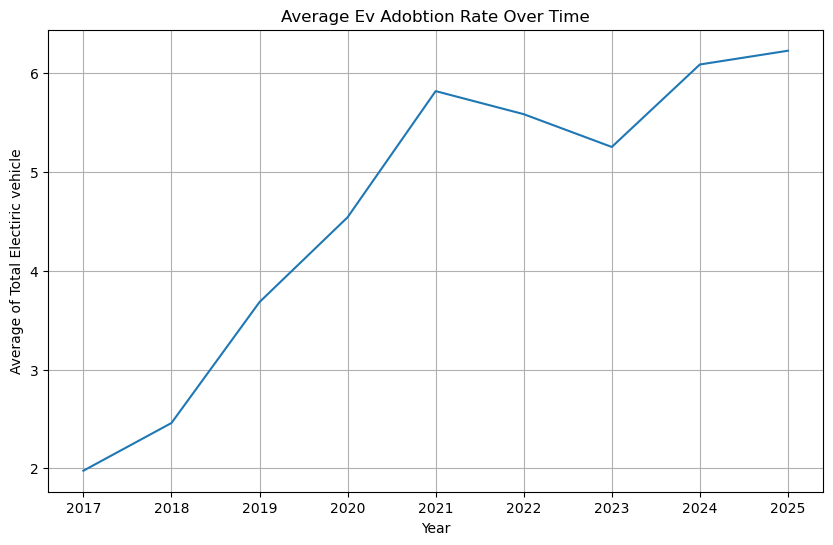

In [23]:
ev_trend=df.groupby('Year')['Percent Electric Vehicles'].mean().reset_index()
plt.figure(figsize=(10,6))
sns.lineplot(data=ev_trend,x='Year',y='Percent Electric Vehicles')
plt.title('Average Ev Adobtion Rate Over Time')
plt.ylabel('Average of Total Electiric vehicle')
plt.grid(True)
plt.show()

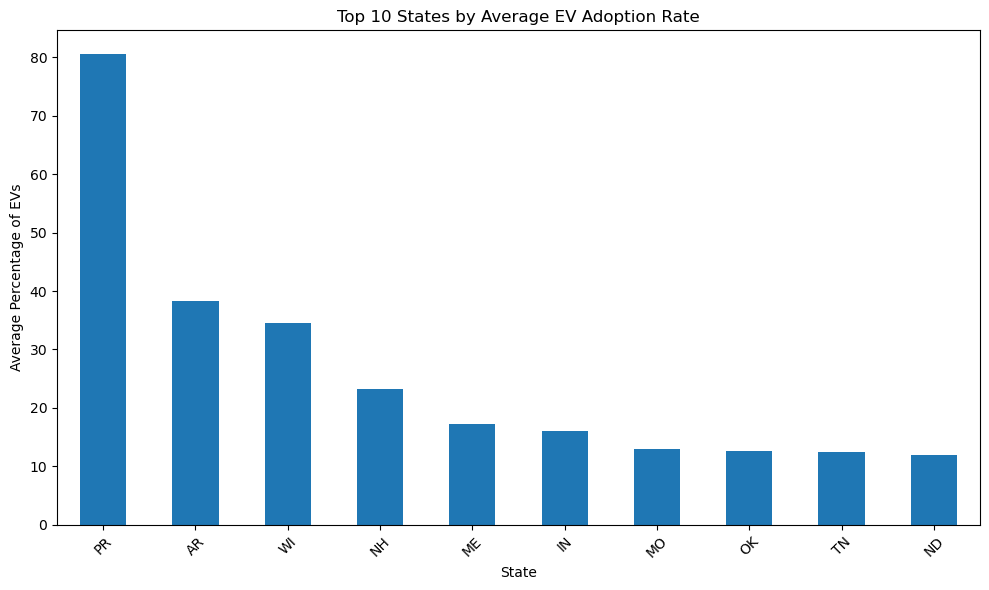

In [25]:
state_ev = df.groupby('State')['Percent Electric Vehicles'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
state_ev.plot(kind='bar')
plt.title('Top 10 States by Average EV Adoption Rate')
plt.ylabel('Average Percentage of EVs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

([<matplotlib.patches.Wedge at 0x1ef8ee8c740>,
 [Text(-1.0048440873809064, 0.5592748519785543, 'Passenger'),
  Text(0.9611552641029494, -0.5349584640765952, 'Truck')],
 [Text(-0.5679553537370339, 0.31611187285744363, '83.83%'),
  Text(0.5242665076925178, -0.291795525859961, '16.17%')])

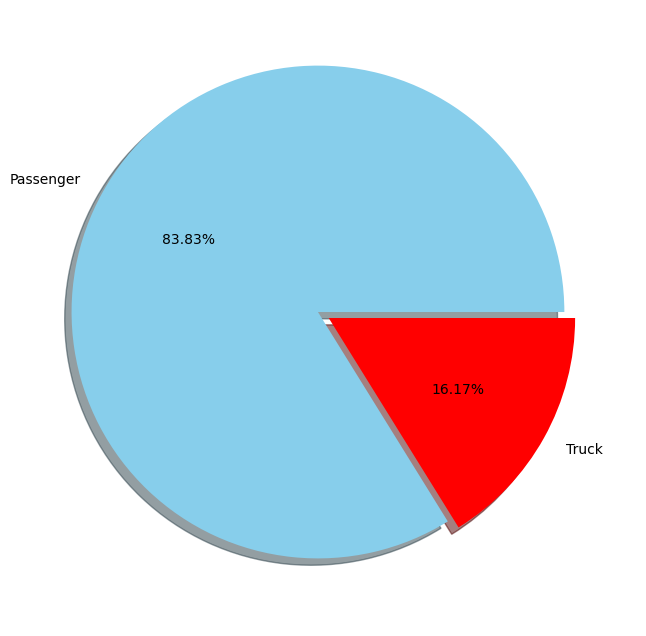

In [27]:
count = df['Vehicle Primary Use'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(count, 
        labels=count.index,
        autopct='%1.2f%%',
        colors=['skyblue','red'],
        explode=(0.05, 0),shadow=True)

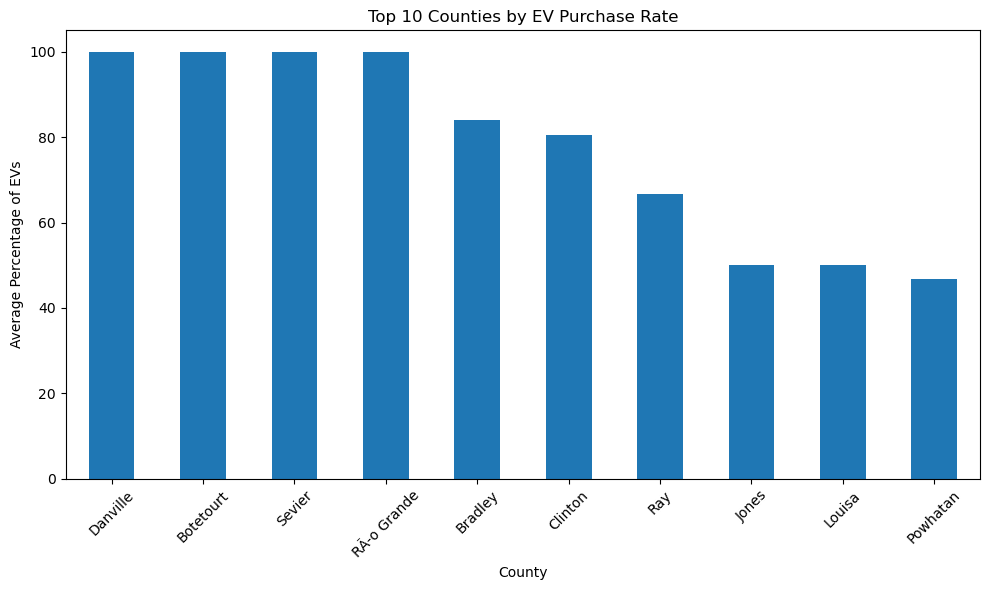

In [29]:
county_ev = df.groupby('County')['Percent Electric Vehicles'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
county_ev.plot(kind='bar')
plt.title('Top 10 Counties by EV Purchase Rate')
plt.ylabel('Average Percentage of EVs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

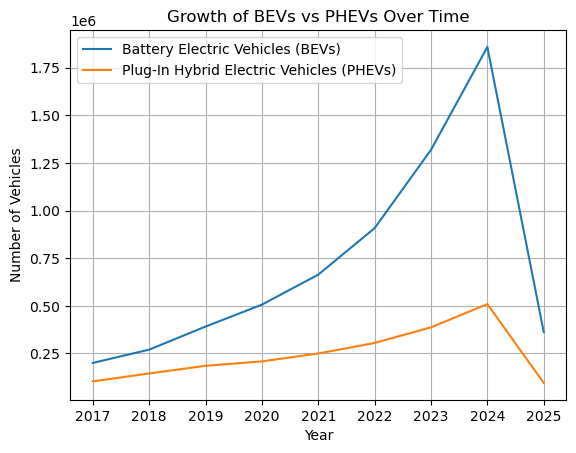

In [31]:
bev_phev = df.groupby('Year')[['Battery Electric Vehicles (BEVs)', 'Plug-In Hybrid Electric Vehicles (PHEVs)']].sum()
plt.figure(figsize=(10, 6))
bev_phev.plot(kind='line')
plt.title('Growth of BEVs vs PHEVs Over Time')
plt.ylabel('Number of Vehicles')
plt.grid(True)
plt.show()

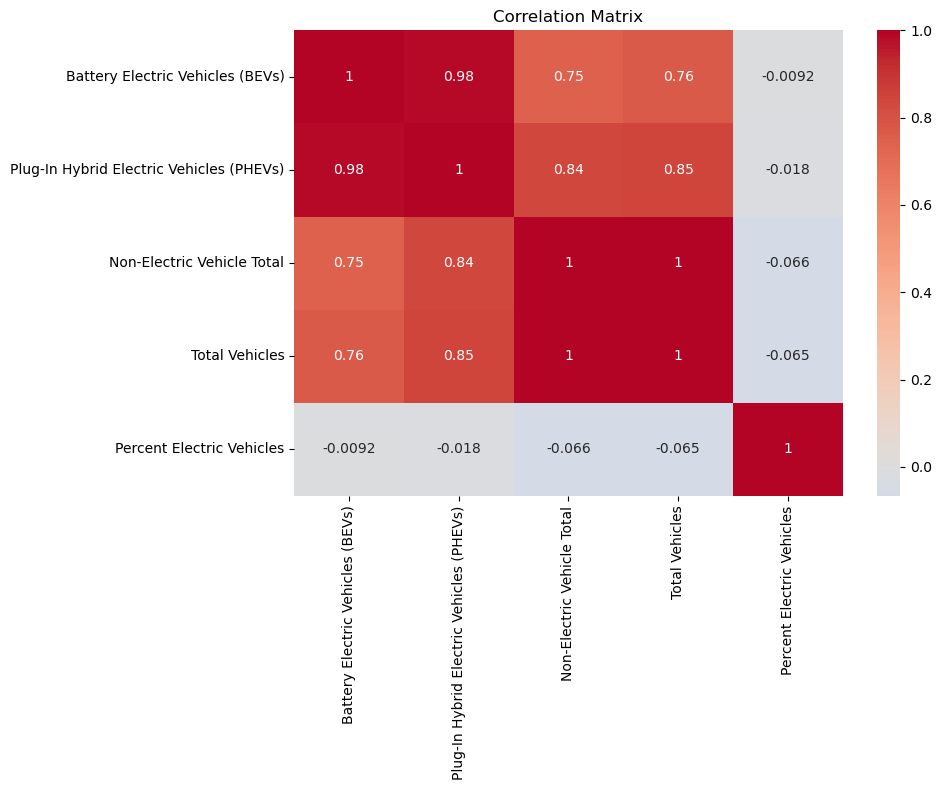

In [33]:
corr_matrix = df[['Battery Electric Vehicles (BEVs)', 'Plug-In Hybrid Electric Vehicles (PHEVs)', 
                  'Non-Electric Vehicle Total','Total Vehicles', 'Percent Electric Vehicles']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

In [35]:
#comparison of ELectric vehicle total and Non-Electric Vehicle Total based on yearly purchase
yearly_totals = df.groupby('Year').agg({
    'Electric Vehicle (EV) Total': 'sum',
    'Non-Electric Vehicle Total': 'sum'
}).reset_index()

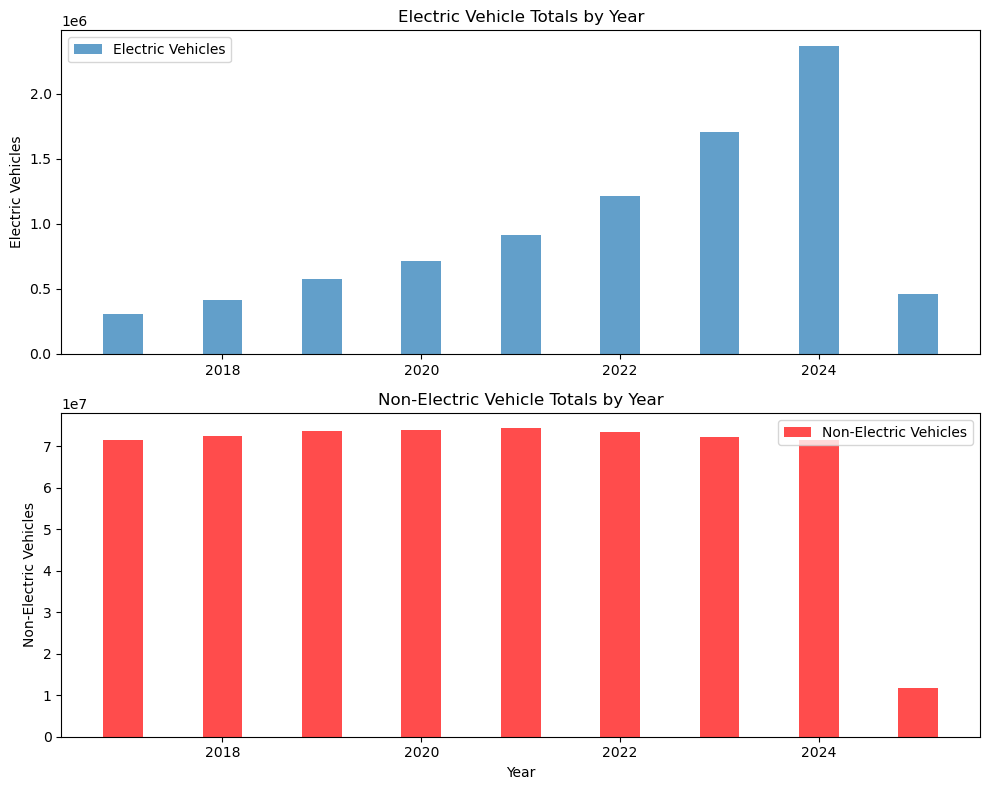

In [37]:
#comparison between ELecti
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10,8))
axes[0].bar(yearly_totals['Year'], yearly_totals['Electric Vehicle (EV) Total'], 
            width=0.4, label='Electric Vehicles', alpha=0.7,)
axes[0].set_ylabel("Electric Vehicles")
axes[0].set_title("Electric Vehicle Totals by Year")
axes[0].legend()

axes[1].bar(yearly_totals['Year'], yearly_totals['Non-Electric Vehicle Total'], 
            width=0.4, label='Non-Electric Vehicles', alpha=0.7,color='red')
axes[1].set_xlabel("Year")
axes[1].set_ylabel("Non-Electric Vehicles")
axes[1].set_title("Non-Electric Vehicle Totals by Year")
axes[1].legend()

plt.tight_layout()
plt.show()

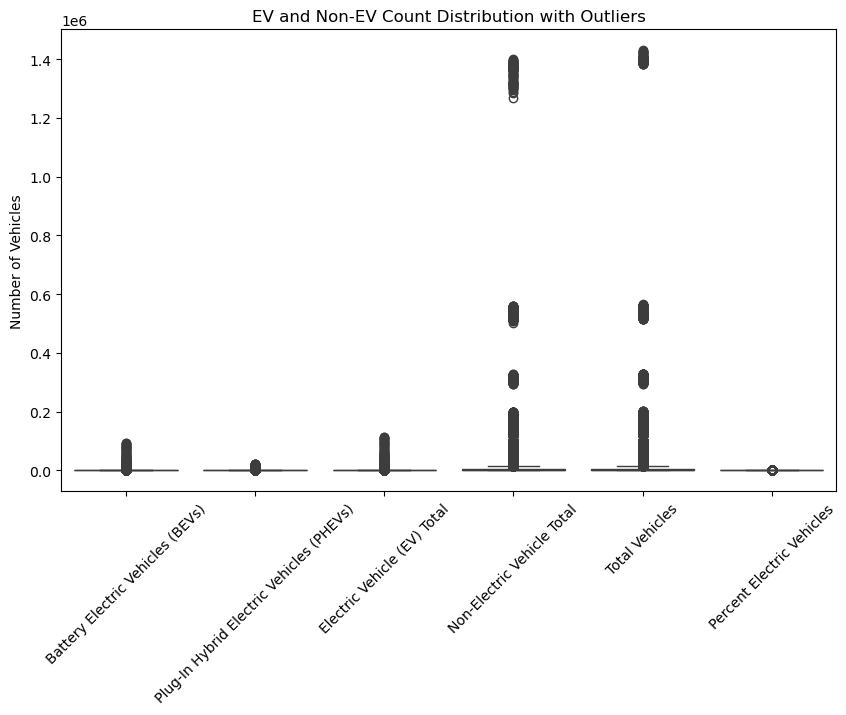

In [39]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Battery Electric Vehicles (BEVs)','Plug-In Hybrid Electric Vehicles (PHEVs)','Electric Vehicle (EV) Total','Non-Electric Vehicle Total','Total Vehicles','Percent Electric Vehicles']])
plt.title('EV and Non-EV Count Distribution with Outliers')
plt.ylabel('Number of Vehicles')
plt.xticks(rotation=45)
plt.show()

In [41]:
#Outlier detection and handling
for i in ['Battery Electric Vehicles (BEVs)','Plug-In Hybrid Electric Vehicles (PHEVs)','Electric Vehicle (EV) Total','Non-Electric Vehicle Total','Total Vehicles','Percent Electric Vehicles']:
    Q1=df[i].quantile (0.25)
    Q3=df[i].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    outliers=df[(df[i]<lower_bound)|(df[i]>upper_bound)]
    print(F"outliers for  {i} : ")
    print(outliers[[i]])

outliers for  Battery Electric Vehicles (BEVs) : 
       Battery Electric Vehicles (BEVs)
4                                 10907
12                                   53
13                                   20
20                                 2309
27                                  653
...                                 ...
25925                              3553
25926                                51
25928                               258
25938                                10
25948                               139

[4546 rows x 1 columns]
outliers for  Plug-In Hybrid Electric Vehicles (PHEVs) : 
       Plug-In Hybrid Electric Vehicles (PHEVs)
4                                          2828
12                                           46
20                                         1685
27                                          307
28                                           31
...                                         ...
25920                                         7
259

In [43]:
# Define columns to process
columns = ['Battery Electric Vehicles (BEVs)','Plug-In Hybrid Electric Vehicles (PHEVs)','Electric Vehicle (EV) Total','Non-Electric Vehicle Total','Total Vehicles','Percent Electric Vehicles']

# Store original data for comparison
df_original = df.copy()

# Cap outliers using IQR method
for col in columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Cap the outliers
    df[col] = df[col].clip(lower_bound, upper_bound)

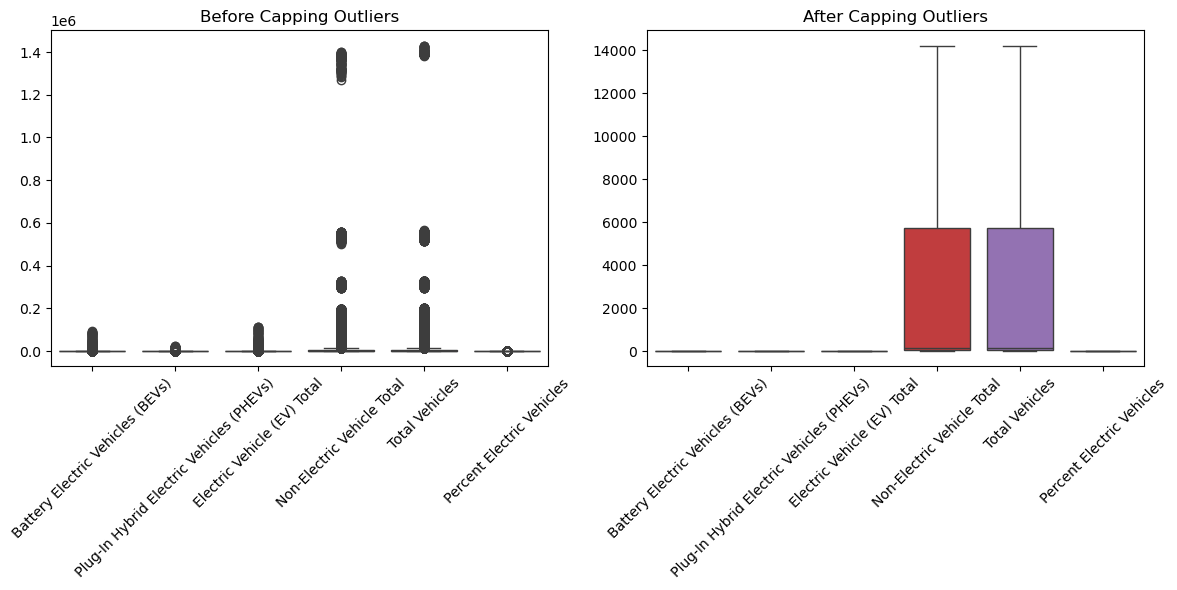

In [45]:
plt.figure(figsize=(12, 6))

# Before capping
plt.subplot(1, 2, 1)
sns.boxplot(data=df_original[columns])
plt.title('Before Capping Outliers')
plt.xticks(rotation=45)

# After capping
plt.subplot(1, 2, 2)
sns.boxplot(data=df[columns])
plt.title('After Capping Outliers')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [47]:
#machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [49]:

#features and target
features = ['Total Vehicles', 'Non-Electric Vehicle Total', 'Percent Electric Vehicles']
x = df[features]
y = df['Electric Vehicle (EV) Total']

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [53]:
#Linear Regression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [55]:
#predicted output
y_pred=regressor.predict(x_test)
y_pred

array([1.97605595, 1.94858316, 5.94443743, ..., 1.87142804, 1.94034441,
       1.89650795])

In [57]:
#Actual output
y_test

24338    4.0
14975    1.0
12643    8.5
20659    0.0
23173    2.0
        ... 
6287     1.0
11848    8.5
1535     1.0
2878     1.0
5140     1.0
Name: Electric Vehicle (EV) Total, Length: 5190, dtype: float64

In [59]:
DF=pd.DataFrame(y_pred,y_test)
DF

,0
Electric Vehicle (EV) Total,
4.0,1.976056
1.0,1.948583
8.5,5.944437
0.0,2.376120
2.0,2.753992
...,...
1.0,1.907004
8.5,4.466324
1.0,1.871428


In [61]:
r2=r2_score(y_test,y_pred)
r2

0.34445444950569215

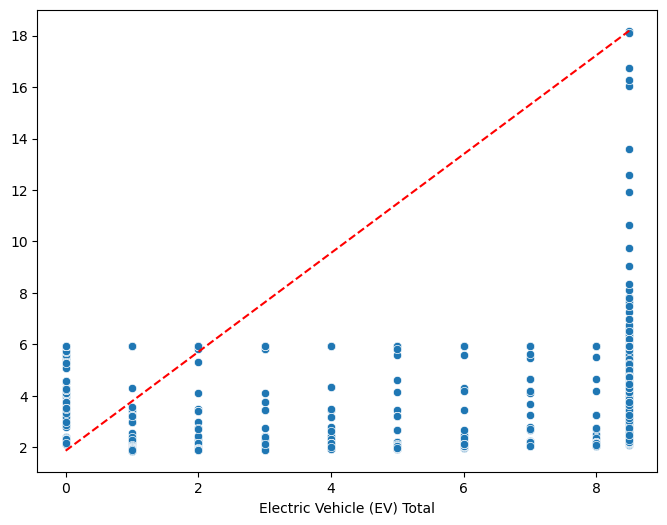

In [63]:
#visualization
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test,y=y_pred)
plt.plot([min(y_test),max(y_test)],[min(y_pred),max(y_pred)],color='r',linestyle="--")

In [65]:
#Random Forest Regressor
rf_regressor=RandomForestRegressor(n_estimators=100,criterion='squared_error',max_depth=3)
rf_regressor.fit(x_train,y_train)

RandomForestRegressor(max_depth=3)

In [67]:
y_pred=rf_regressor.predict(x_test)
RF=pd.DataFrame(y_pred,y_test)
RF

,0
Electric Vehicle (EV) Total,
4.0,4.384891
1.0,1.535106
8.5,8.339772
0.0,0.287102
2.0,4.902484
...,...
1.0,1.567602
8.5,8.339772
1.0,1.154683


In [69]:
R2=r2_score(y_test,y_pred)
R2   

0.8431762309130515

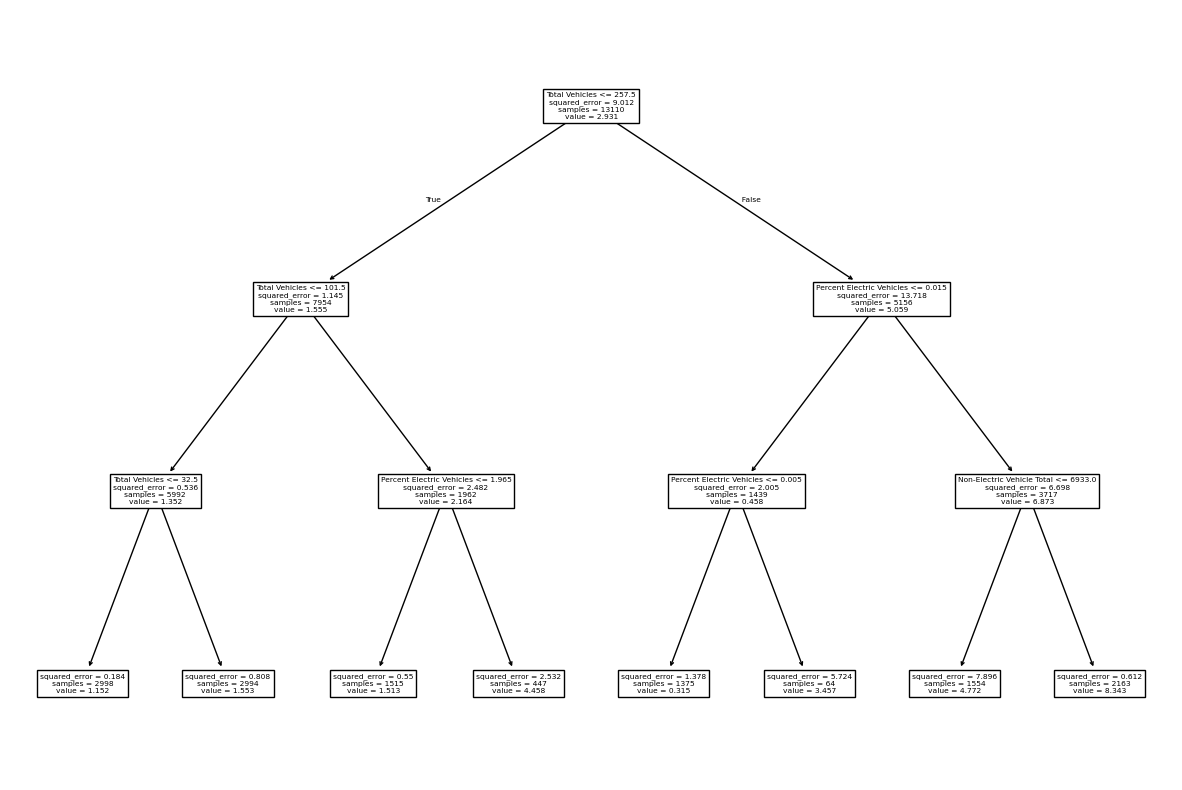

In [71]:
from sklearn.tree import plot_tree
tree=rf_regressor.estimators_[0]
plt.figure(figsize=(15,10))
plot_tree(tree,feature_names=['Total Vehicles', 'Non-Electric Vehicle Total', 'Percent Electric Vehicles'])
plt.show()

In [73]:
#support vector regression

In [75]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [77]:

svr_rbf=SVR(kernel='rbf',C=100,epsilon=0.1)


In [79]:
svr_rbf.fit(x_train,y_train)

SVR(C=100)

In [80]:
y_pred_R=svr_rbf.predict(x_test)


 accuracy score :0.7220743850475146


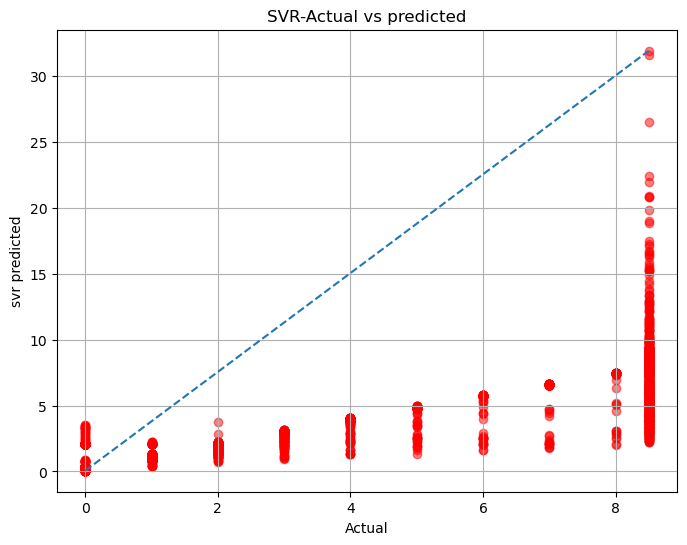

In [81]:
from sklearn.metrics import r2_score
r2_rbf=r2_score(y_test,y_pred_R)
print (f" accuracy score :{r2_rbf}")
#plot
plt.figure (figsize=(8,6))
plt.scatter(y_test,y_pred_R,alpha=0.5,color='r')
plt.plot([y_test.min(),y_test.max()],[y_pred_R.min(),y_pred_R.max()],linestyle='--')
plt.xlabel('Actual')
plt.ylabel('svr predicted')
plt.grid(True)
plt.title('SVR-Actual vs predicted')
plt.show()



_____________________REPORT_______________________-
After evalulating with different Machine Learning models such as Linear Regression,Random Forest,Decision Tree,SVR    

Random forest predicted the best accuracy among other machine learning models r2 score is 0.84 